In [47]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
from pandasql import sqldf

makeQuery = lambda q: sqldf(q, globals())

In [2]:
os.listdir('./data/data_files')

['regions_hcps.csv',
 'rtes.csv',
 'sales_train.csv',
 'region_hcp_joined.csv',
 'activity.csv',
 'hcps.csv',
 'regions.csv']

In [3]:
regions = pd.read_csv('./data/data_files/regions.csv')
hcps = pd.read_csv('./data/data_files/hcps.csv')
activity = pd.read_csv('./data/data_files/activity.csv')
salesTrain = pd.read_csv('./data/data_files/sales_train.csv')
rtes = pd.read_csv('./data/data_files/rtes.csv')
regionHcps = pd.read_csv('./data/data_files/regions_hcps.csv')
regions.shape, hcps.shape, activity.shape, salesTrain.shape, rtes.shape, regionHcps.shape

((201, 5), (4939, 4), (53938, 7), (18100, 4), (41668, 11), (201, 9))

In [4]:
regions.tail()

,region,population,area,pci16,pci18
196,region_196,488935,4383.308467,47628.428064,50590.455429
197,region_197,367538,6688.080642,41370.782569,44005.413325
198,region_198,374756,6500.068131,43452.297389,45337.580895
199,region_199,319660,2309.103167,40976.821501,42691.767247
200,region_200,395114,2598.725436,44282.292557,46215.140591


In [5]:
hcps.head()

,hcp,tier,region,specialty
0,83,2,region_59,Internal medicine
1,112,1,region_103,Internal medicine
2,307,2,region_33,Internal medicine / pneumology
3,387,2,region_97,Internal medicine / pneumology
4,426,1,region_118,General practicioner


In [6]:
hcps[hcps['hcp'] == 307]

,hcp,tier,region,specialty
2,307,2,region_33,Internal medicine / pneumology


In [7]:
len(set(hcps.hcp.values.tolist())), hcps.shape

(4939, (4939, 4))

In [8]:
activity.head()

,hcp,specialty,region,brand,month,channel,count
0,39972,Internal medicine / pneumology,region_61,brand_1,2020-05,video,1
1,64026,General practicioner,region_168,brand_2,2020-05,phone,1
2,27892,Internal medicine,region_26,brand_2,2020-06,phone,1
3,33500,General practicioner,region_26,brand_2,2020-06,phone,1
4,61239,General practicioner,region_26,brand_2,2020-06,phone,1


In [9]:
activity.groupby('hcp').count().sort_values('specialty', ascending=False)

,specialty,region,brand,month,channel,count
hcp,,,,,,
32137,45,45,45,45,45,45
59771,44,44,44,44,44,44
79877,37,37,37,37,37,37
26277,37,37,37,37,37,37
55843,36,36,36,36,36,36
...,...,...,...,...,...,...
61937,1,1,1,1,1,1
35461,1,1,1,1,1,1
61930,1,1,1,1,1,1


In [10]:
activity[activity['hcp'] == 32137]

,hcp,specialty,region,brand,month,channel,count
4337,32137,Internal medicine / pneumology,region_164,brand_2,2020-07,f2f,1
4338,32137,Internal medicine / pneumology,region_164,brand_2,2020-07,phone,2
4339,32137,Internal medicine / pneumology,region_164,brand_2,2020-07,video,1
11382,32137,Internal medicine / pneumology,region_164,brand_2,2020-08,f2f,1
11383,32137,Internal medicine / pneumology,region_164,brand_2,2020-08,phone,5
11384,32137,Internal medicine / pneumology,region_164,brand_1,2020-08,phone,3
20279,32137,Internal medicine / pneumology,region_164,brand_2,2020-09,phone,2
20280,32137,Internal medicine / pneumology,region_164,brand_1,2020-09,phone,2
29362,32137,Internal medicine / pneumology,region_164,brand_2,2020-10,video,2
29363,32137,Internal medicine / pneumology,region_164,brand_1,2020-10,video,2


In [11]:
activity[activity['region'] == 'region_164']

,hcp,specialty,region,brand,month,channel,count
4316,5627,Internal medicine,region_164,brand_2,2020-07,f2f,1
4317,5627,Internal medicine,region_164,brand_2,2020-07,phone,1
4318,15184,Internal medicine,region_164,brand_2,2020-07,phone,1
4319,18104,Internal medicine,region_164,brand_2,2020-07,phone,1
4320,18966,Internal medicine,region_164,brand_2,2020-07,phone,1
...,...,...,...,...,...,...,...
53511,42610,Internal medicine / pneumology,region_164,brand_1,2021-09,f2f,1
53512,55580,Internal medicine / pneumology,region_164,brand_1,2021-09,f2f,1
53513,57788,Internal medicine / pneumology,region_164,brand_1,2021-09,f2f,1
53514,60226,Internal medicine / pneumology,region_164,brand_1,2021-09,f2f,1


In [12]:
salesTrain.head(n=10)

,month,region,brand,sales
0,2020-01,region_0,brand_1,0.00
1,2020-01,region_0,brand_2,0.00
2,2020-01,region_0,brand_3,65007.49
3,2020-01,region_0,brand_12_market,509023.69
4,2020-01,region_0,brand_3_market,940469.05
5,2020-01,region_1,brand_1,0.00
6,2020-01,region_1,brand_2,0.00
7,2020-01,region_1,brand_3,45929.88
8,2020-01,region_1,brand_12_market,344182.42
9,2020-01,region_1,brand_3_market,625300.10


In [39]:
salesTest = salesTrain[salesTrain['region'].apply(lambda x: int(x.split('_')[1]) > 150)]
salesTest.shape, salesTrain.shape

((3000, 4), (18100, 4))

In [40]:
salesTest.head()

,month,region,brand,sales
755,2020-01,region_151,brand_3,35347.30
756,2020-01,region_151,brand_12_market,213189.25
757,2020-01,region_151,brand_3_market,423435.51
758,2020-01,region_152,brand_3,34091.04
759,2020-01,region_152,brand_12_market,188121.51


In [41]:
salesTrain.drop(salesTest.index, inplace=True, axis=0)

In [13]:
rtes.head()

,hcp,specialty,region,brand,email_type,content_id,no. openings,no. clicks,time_sent,time_last_opened,time_last_clicked
0,58555,General practicioner,region_0,brand_1,general,a3D6f0000019jMvEAI,1,0,2021-03-02 08:42:00,2021-03-02 08:45:00,NaN
1,819,General practicioner,region_1,brand_2,product_related,a3D6f0000019gA2EAI,0,0,2020-07-16 11:58:00,NaN,NaN
2,819,General practicioner,region_1,brand_2,general,a3D6f0000019jSnEAI,1,0,2020-08-17 14:47:00,2020-08-17 23:16:00,NaN
3,819,General practicioner,region_1,brand_1,product_related,a3D6f000000MtZ3EAK,0,0,2020-09-03 16:08:00,NaN,NaN
4,819,General practicioner,region_1,brand_1,general,a3D6f000000N0nhEAC,1,0,2020-10-16 13:35:00,2020-10-16 22:39:00,NaN


In [14]:
regionHcps.head()

,region,area,pci16,pci18,Internal medicine,Internal medicine / pneumology,General practicioner,Internal medicine and general practicioner,Pediatrician
0,region_0,1372.440545,38799.972381,40214.895762,315,18,264,2,82
1,region_1,4701.726213,45377.708041,47137.854237,239,7,273,1,42
2,region_2,2574.943849,42578.018793,44456.389595,153,5,182,2,47
3,region_3,3639.373478,46856.492170,48564.228841,181,11,206,0,30
4,region_4,3926.381089,44462.421679,46388.545070,151,9,199,0,33


## Transform data

In [15]:
regionHcpsTransformed = pd.concat([regions.set_index('region', drop=True).drop(['area', 'pci16', 'pci18'], axis=1), 
                                   regionHcps.set_index('region', drop=True)], axis=1)
regionHcpsTransformed.shape

(201, 9)

In [16]:
regionHcpsTransformed.head()

,population,area,pci16,pci18,Internal medicine,Internal medicine / pneumology,General practicioner,Internal medicine and general practicioner,Pediatrician
region,,,,,,,,,
region_0,381958,1372.440545,38799.972381,40214.895762,315,18,264,2,82
region_1,431383,4701.726213,45377.708041,47137.854237,239,7,273,1,42
region_2,318026,2574.943849,42578.018793,44456.389595,153,5,182,2,47
region_3,343861,3639.373478,46856.492170,48564.228841,181,11,206,0,30
region_4,330916,3926.381089,44462.421679,46388.545070,151,9,199,0,33


In [17]:
# regionHcpAll = pd.concat([regionHcpsTransformed, hcps.set_index('region', drop=True)], axis=1)
regionHcpAll = regionHcpsTransformed.merge(hcps, how='inner',  right_on='region', left_index=True)
regionHcpAll.set_index('hcp', drop=False, inplace=True)
regionHcpAll.sort_index(inplace=True)
regionHcpAll.shape

(4939, 13)

In [23]:
regionHcpAll.head()

,population,area,pci16,pci18,Internal_medicine,Internal_medicine_/_pneumology,General_practicioner,Internal_medicine_and_general_practicioner,Pediatrician,hcp,tier,region,specialty
0,366237,456.777404,47846.729220,49044.242242,265,10,259,1,40,83,2,region_59,Internal medicine
1,385727,1076.159286,40191.980296,41539.866835,242,16,161,3,41,112,1,region_103,Internal medicine
2,419101,7692.893495,36767.221470,38579.415115,250,11,225,0,32,307,2,region_33,Internal medicine / pneumology
3,338417,3708.777236,38747.410778,41145.649040,259,18,161,1,55,387,2,region_97,Internal medicine / pneumology
4,311316,4469.158205,41460.329717,43261.443760,174,4,230,7,44,426,1,region_118,General practicioner


In [20]:
regionHcpAll.reset_index(drop=True, inplace=True)

In [22]:
regionHcpAll.rename(columns={c: c.replace(' ', '_') for c in regionHcpAll.columns}, inplace=True)

In [25]:
regionHcpAll.to_csv('./data/data_files/region_hcp_joined.csv')

In [26]:
query = """
SELECT 
    region, 
    tier,
    COUNT(hcp) AS hcp_count
    
FROM regionHcpAll
GROUP BY region, tier
"""
makeQuery(query)

,region,tier,hcp_count
0,region_0,1,17
1,region_0,2,16
2,region_1,1,8
3,region_1,2,43
4,region_10,1,5
...,...,...,...
414,region_97,2,14
415,region_98,1,8
416,region_98,2,24
417,region_99,1,6


In [28]:
query = """
SELECT specialty, COUNT(hcp) AS hcp_count
FROM hcps
GROUP BY specialty
"""
hcp_per_specialty = makeQuery(query)
hcp_per_specialty

,specialty,hcp_count
0,General practicioner,1861
1,Internal medicine,1227
2,Internal medicine / pneumology,1766
3,Internal medicine and general practicioner,49
4,Pediatrician,36


In [36]:
query = """
SELECT 
    regions.region, 
    population, 
    area, 
    pci16, 
    pci18, 
    hcp_count, 
    hcp_count/area AS hcp_density, 
    population/area AS population_density, 
    hcp_count / (population/area) AS hcp_per_population_density
FROM (
    SELECT region, COUNT(hcp) AS hcp_count
    FROM hcps
    GROUP BY region 
    ) AS hcp_per_region
INNER JOIN regions
ON regions.region = hcp_per_region.region
"""
hcp_count = makeQuery(query)
hcp_count

,region,population,area,pci16,pci18,hcp_count,hcp_density,population_density,hcp_per_population_density
0,region_0,381958,1372.440545,38799.972381,40214.895762,33,0.024045,278.305681,0.118575
1,region_1,431383,4701.726213,45377.708041,47137.854237,51,0.010847,91.749919,0.555859
2,region_2,318026,2574.943849,42578.018793,44456.389595,9,0.003495,123.507936,0.072870
3,region_3,343861,3639.373478,46856.492170,48564.228841,32,0.008793,94.483570,0.338683
4,region_4,330916,3926.381089,44462.421679,46388.545070,10,0.002547,84.280153,0.118652
...,...,...,...,...,...,...,...,...,...
196,region_196,488935,4383.308467,47628.428064,50590.455429,17,0.003878,111.544739,0.152405
197,region_197,367538,6688.080642,41370.782569,44005.413325,8,0.001196,54.954182,0.145576
198,region_198,374756,6500.068131,43452.297389,45337.580895,57,0.008769,57.654165,0.988654
199,region_199,319660,2309.103167,40976.821501,42691.767247,7,0.003031,138.434698,0.050565


<AxesSubplot:xlabel='area', ylabel='hcp_count'>

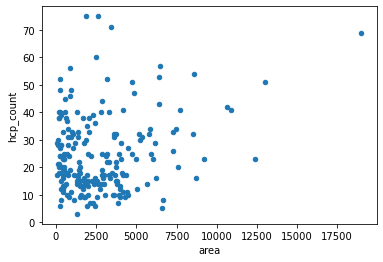

In [38]:
hcp_count.plot.scatter(x='area', y='hcp_count')

<AxesSubplot:xlabel='population_density', ylabel='hcp_count'>

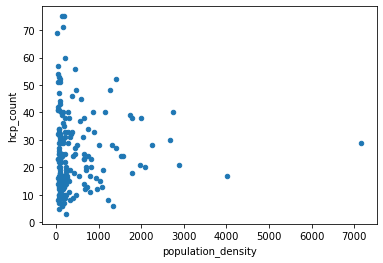

In [35]:
hcp_count.plot.scatter(x='population_density', y='hcp_count')

<AxesSubplot:xlabel='population', ylabel='hcp_count'>

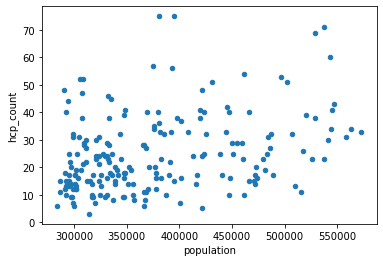

In [37]:
hcp_count.plot.scatter(x='population', y='hcp_count')

In [45]:
query = """
SELECT region, brand, SUM(sales) AS total_sales
FROM salesTrain
GROUP BY region, brand
"""
total_sales_per_region = makeQuery(query)
total_sales_per_region

,region,brand,total_sales
0,region_0,brand_1,41909.60
1,region_0,brand_12_market,10666956.92
2,region_0,brand_2,7819.61
3,region_0,brand_3,1117086.86
4,region_0,brand_3_market,18755013.60
...,...,...,...
750,region_99,brand_1,7997.79
751,region_99,brand_12_market,5618976.22
752,region_99,brand_2,1318.61
753,region_99,brand_3,440383.79


In [51]:
query = """
SELECT 
    hcp_count.region, 
    brand, 
    total_sales, 
    population, 
    area, 
    pci16, 
    pci18, 
    hcp_count, 
    hcp_density, 
    population_density, 
    hcp_per_population_density
FROM total_sales_per_region
INNER JOIN hcp_count
ON hcp_count.region = total_sales_per_region.region
"""
hcp_sales_joined = makeQuery(query)

In [52]:
hcp_sales_joined.shape

(755, 11)

In [53]:
hcp_sales_joined.head()

,region,brand,total_sales,population,area,pci16,pci18,hcp_count,hcp_density,population_density,hcp_per_population_density
0,region_0,brand_1,41909.60,381958,1372.440545,38799.972381,40214.895762,33,0.024045,278.305681,0.118575
1,region_0,brand_12_market,10666956.92,381958,1372.440545,38799.972381,40214.895762,33,0.024045,278.305681,0.118575
2,region_0,brand_2,7819.61,381958,1372.440545,38799.972381,40214.895762,33,0.024045,278.305681,0.118575
3,region_0,brand_3,1117086.86,381958,1372.440545,38799.972381,40214.895762,33,0.024045,278.305681,0.118575
4,region_0,brand_3_market,18755013.60,381958,1372.440545,38799.972381,40214.895762,33,0.024045,278.305681,0.118575


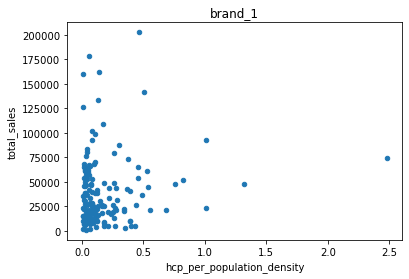

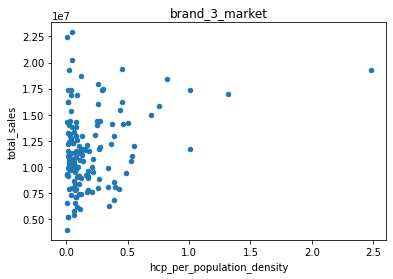

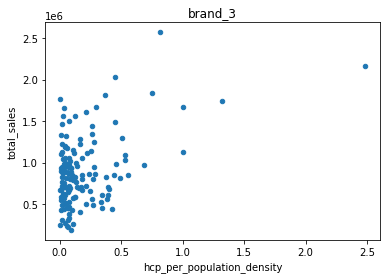

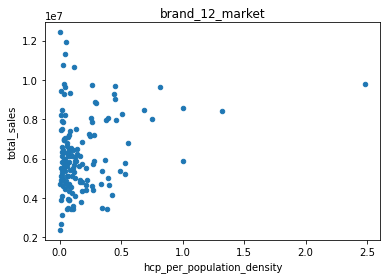

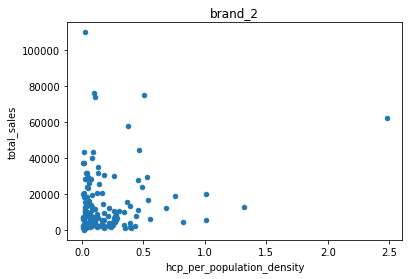

In [57]:
for value in set(hcp_sales_joined.brand.values.tolist()): 
    hcp_sales_joined[hcp_sales_joined['brand'] == value].plot.scatter(x='hcp_per_population_density', y='total_sales')
    plt.title(value)

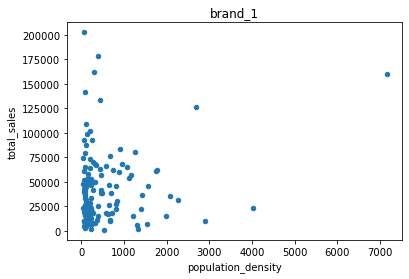

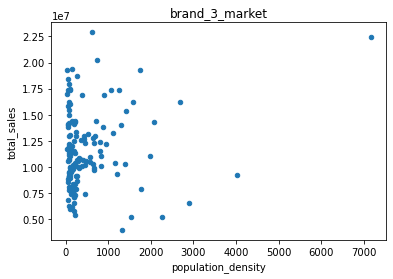

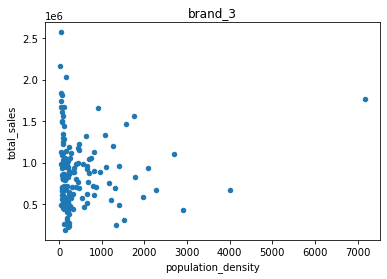

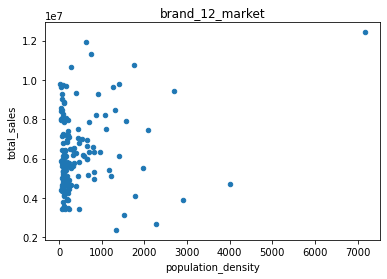

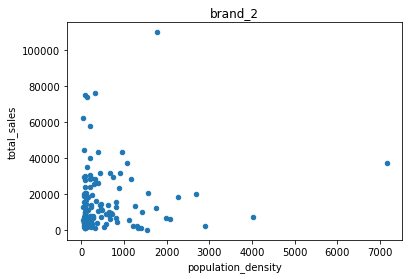

In [58]:
for value in set(hcp_sales_joined.brand.values.tolist()): 
    hcp_sales_joined[hcp_sales_joined['brand'] == value].plot.scatter(x='population_density', y='total_sales')
    plt.title(value)

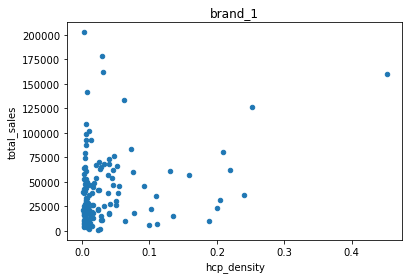

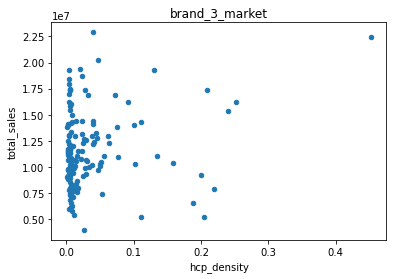

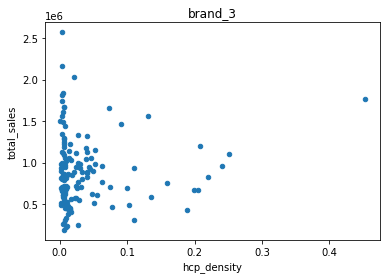

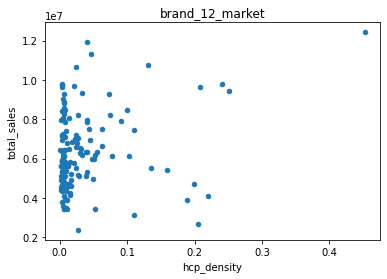

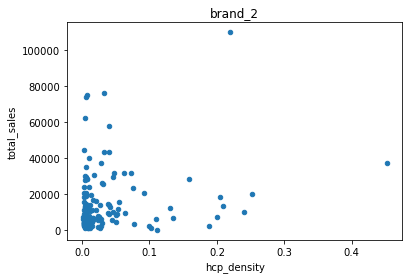

In [59]:
for value in set(hcp_sales_joined.brand.values.tolist()): 
    hcp_sales_joined[hcp_sales_joined['brand'] == value].plot.scatter(x='hcp_density', y='total_sales')
    plt.title(value)

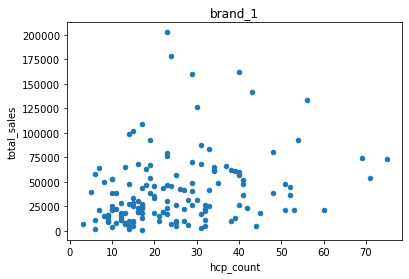

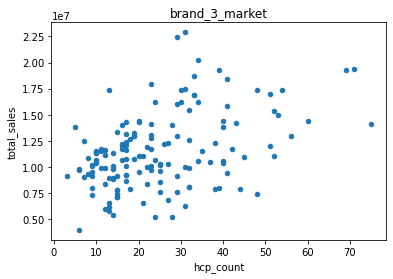

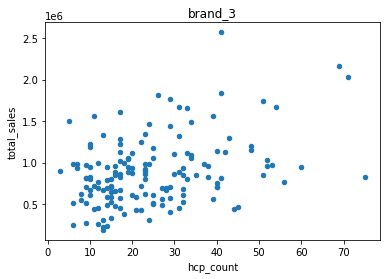

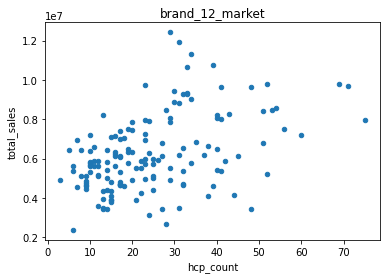

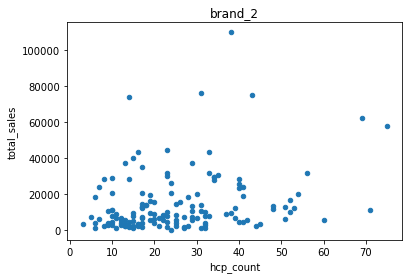

In [60]:
for value in set(hcp_sales_joined.brand.values.tolist()): 
    hcp_sales_joined[hcp_sales_joined['brand'] == value].plot.scatter(x='hcp_count', y='total_sales')
    plt.title(value)